# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0.1 Loading data

In [2]:
df = pd.read_csv('../data/df_ready.csv')

# 1.0 Data Description

In [3]:
df1 = df.copy()

## 1.1 Data Dimension

In [4]:
print(f'Number of Rows {df1.shape[0]}')
print(f'Number of Columns {df1.shape[1]}')

Number of Rows 23151
Number of Columns 32


## 1.2 Data Columns

In [5]:
# Criando a lista de colunas a Dropar
cols_drop = ['Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'currency', 'imageURLs', 
             'shipping', 'sourceURLs', 'weight', 'Date_imp_d.1', 'Zscore_1', 'price_std']

df1 = df1.drop(columns=cols_drop)

# Criando a lista com as colunas que sobraram em snake_case
cols_name  = ['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant', 'disc_percentage', 'imp_count', 
              'Imp_count', 'brand', 'p_description', 'date_added', 'date_seen', 'date_updated', 'manufacturer', 'day_n', 
              'month', 'month_n', 'day', 'week_number']

df1.columns = cols_name

print(f'O número de colunas foi para: {df1.shape[1]}')

O número de colunas foi para: 20


In [6]:
df1.columns

Index(['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant',
       'disc_percentage', 'imp_count', 'Imp_count', 'brand', 'p_description',
       'date_added', 'date_seen', 'date_updated', 'manufacturer', 'day_n',
       'month', 'month_n', 'day', 'week_number'],
      dtype='object')

## 1.3 Data Types

In [7]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
imp_count           object
Imp_count            int64
brand               object
p_description       object
date_added          object
date_seen           object
date_updated        object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.4 Change Types

In [8]:
df1['date_imp'] = pd.to_datetime( df1['date_imp'] )

## 1.5 Check NA

In [9]:
df1.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
imp_count              0
Imp_count              0
brand                  0
p_description          0
date_added             0
date_seen              0
date_updated           0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.6 Descriptive Statistics

In [10]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64'] )

In [11]:
# Central Tendency - mean, median

ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
1,disc_price,1.0,10879.95,10878.95,494.104295,199.00,808.571509,4.748349,39.612839
2,disc_percentage,0.0,0.80,0.80,0.016933,0.00,0.077847,5.217632,28.754920
3,Imp_count,1.0,31.00,30.00,6.560926,5.00,5.403049,1.286351,1.639569
4,month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
5,day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
6,week_number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


# 2.0 Exploratory Data Analysis

In [12]:
df2 = df1.copy()

- Qual Merchant mais vendeu?
- Qual a categoria mais vendida?
- Qual a marca mais vendida?
- Quais os dias que mais vendem?
- Quais o meses que mais vendem?
- Quais semanas mais vendem?

## 2.1 Qual Merchant mais vendeu?

In [13]:
df_bb = df2.loc[ (df2['merchant'] == 'Bestbuy.com') , :]
df_bhp = df2.loc[ (df2['merchant'] == 'bhphotovideo.com') , :]
df_walmart = df2.loc[ (df2['merchant'] == 'Walmart.com') , :]
df_ebay = df2.loc[ (df2['merchant'] == 'ebay.com') , :]

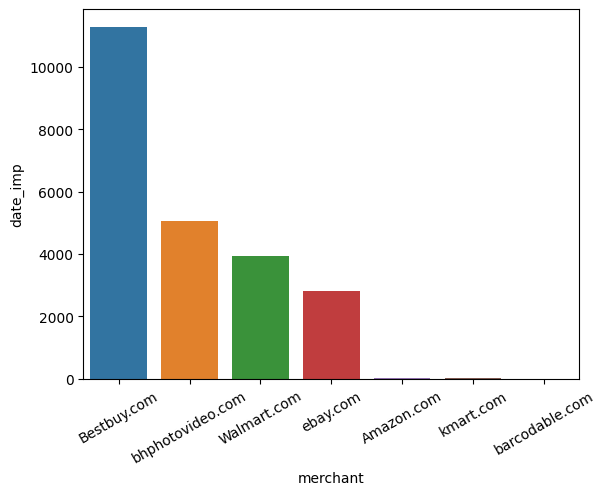

In [14]:
aux1 = df2[['date_imp', 'merchant']].groupby('merchant').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=30)
sns.barplot( data=aux1, x='merchant', y='date_imp' );

## 2.2 Qual a categoria mais vendida?

### 2.2.1 Categoria mais vendida no geral

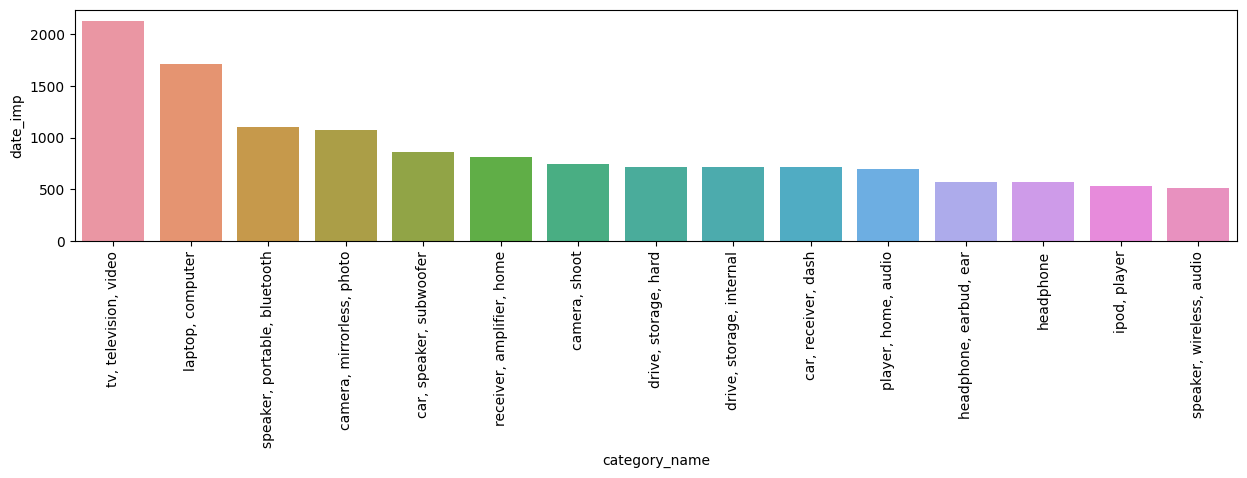

In [15]:
plt.figure(figsize=(15,3))
aux1 = df2[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
sns.barplot( data=aux1.head(15), x='category_name', y='date_imp' );

### 2.2.2. Categoria mais vendida por loja

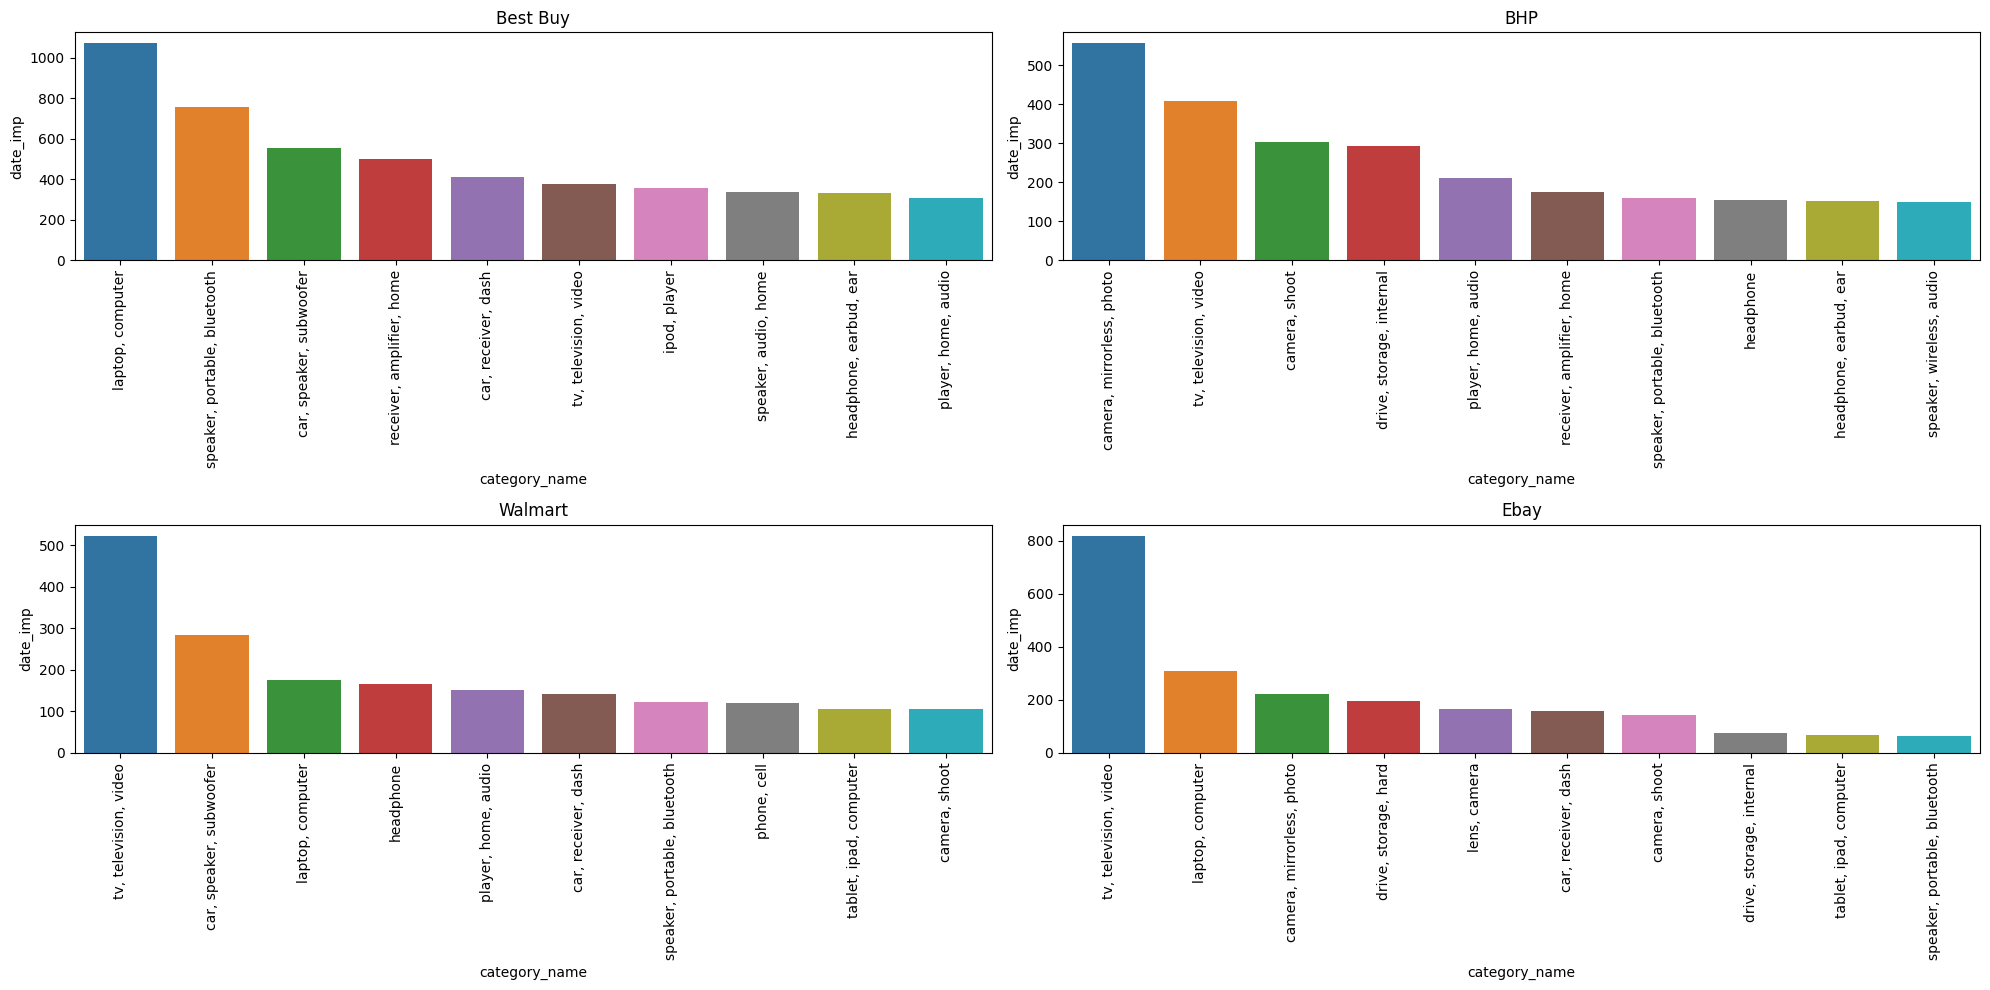

In [16]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1.head(10), x='category_name', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2.head(10), x='category_name', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3.head(10), x='category_name', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4.head(10), x='category_name', y='date_imp' );

plt.tight_layout()

## 2.3 Qual é a marca mais vendida?

### 2.3.1 No Geral

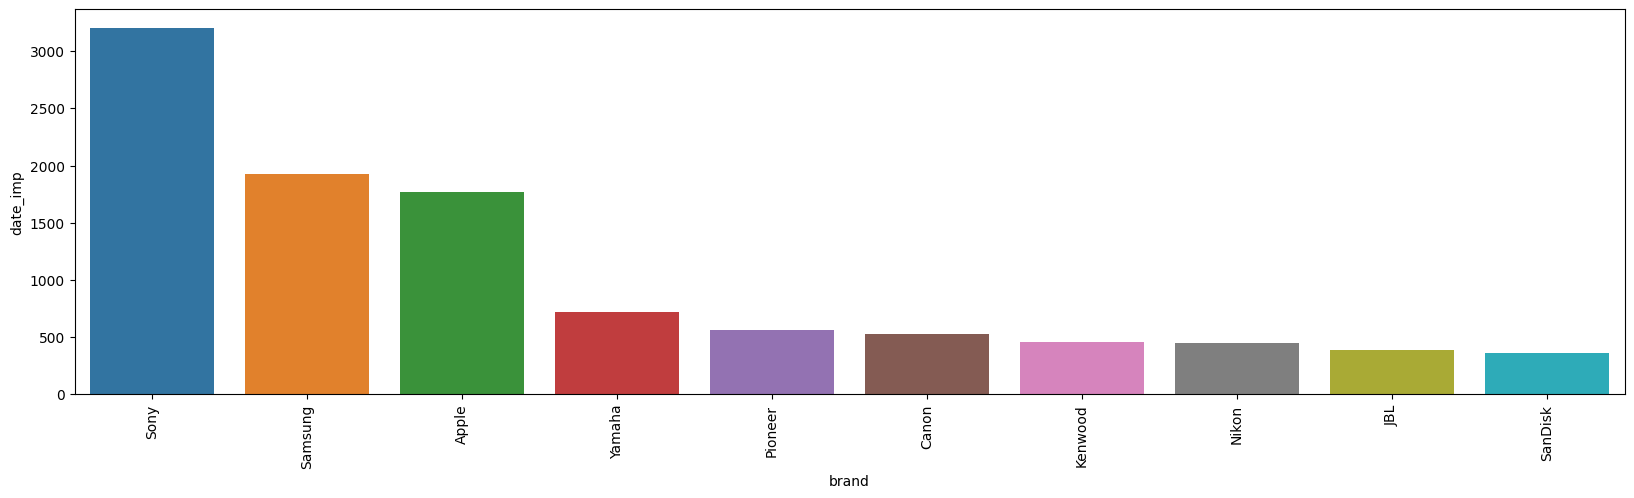

In [17]:
plt.figure(figsize=(20,5))
aux1 = df2[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=10)
sns.barplot( data=aux1.head(10), x='brand', y='date_imp' );

### 2.3.2 Por loja

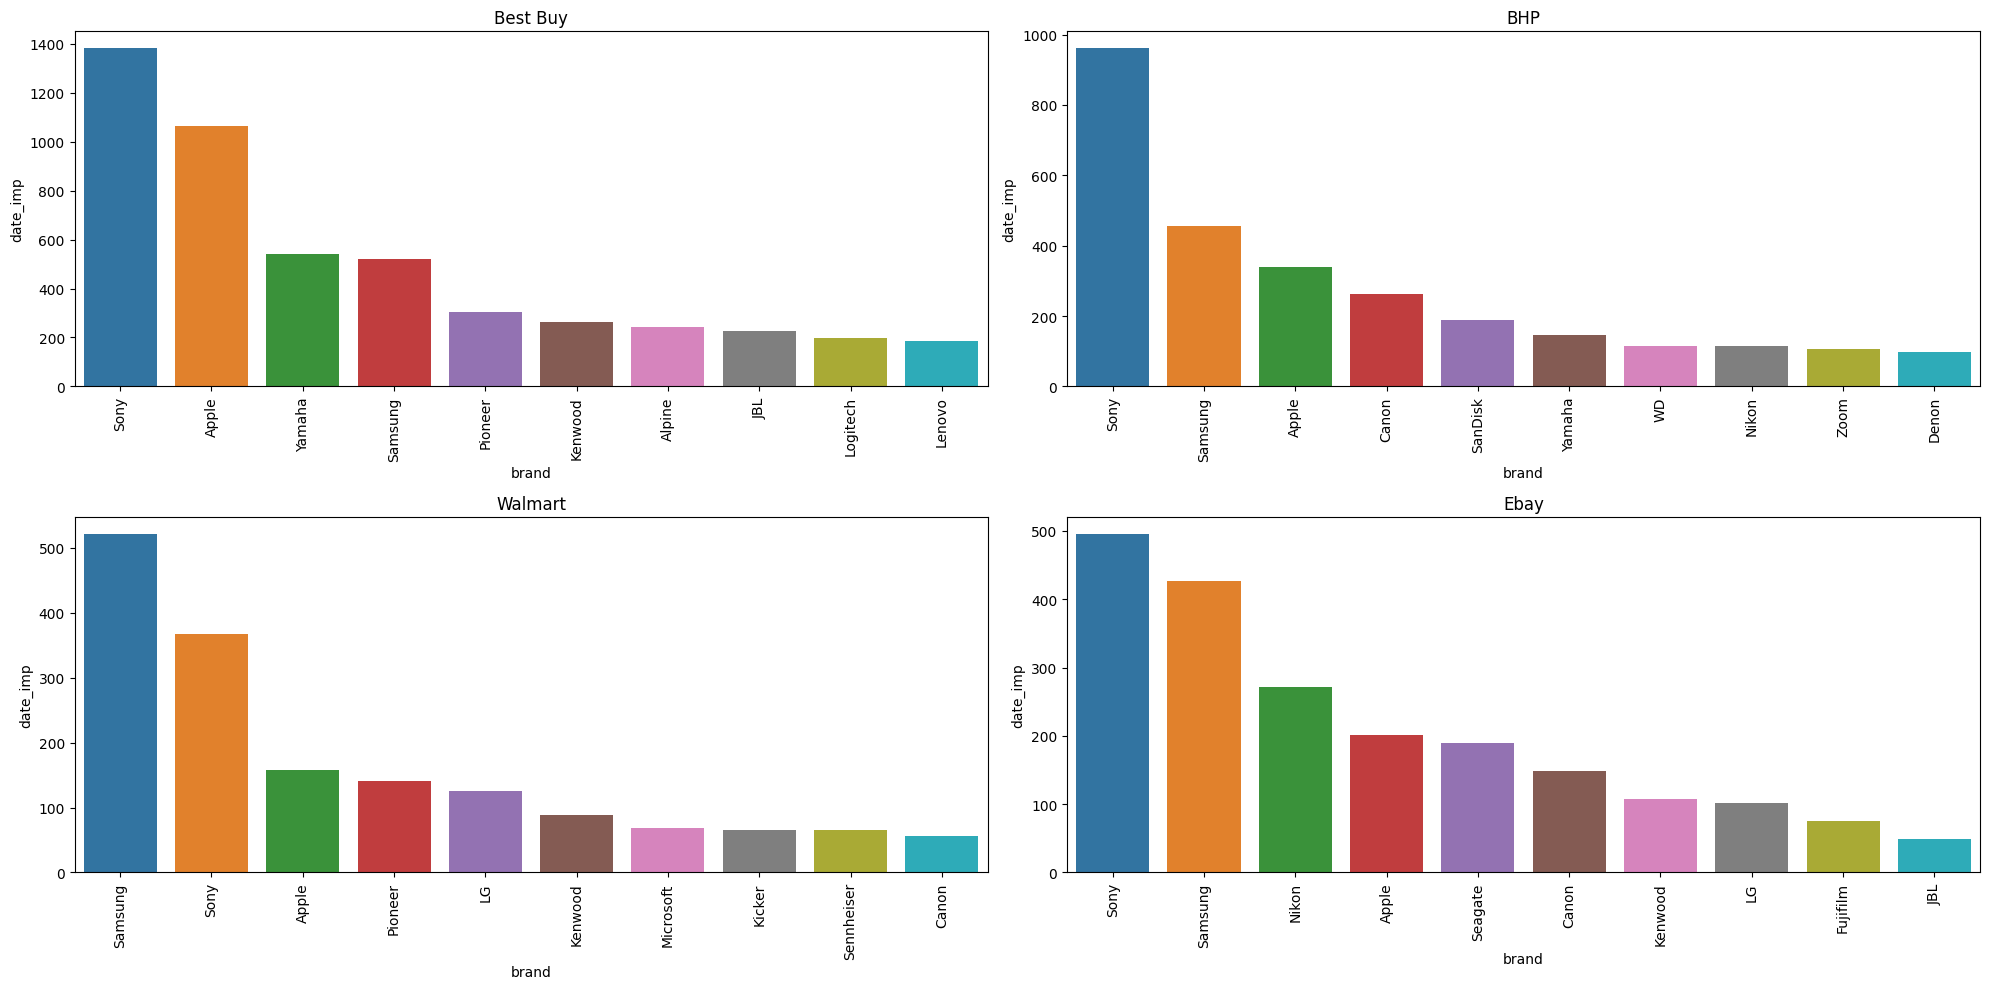

In [18]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1.head(10), x='brand', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2.head(10), x='brand', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3.head(10), x='brand', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4.head(10), x='brand', y='date_imp' );

plt.tight_layout()

## 2.4 Quais os dias que mais vendem?

### 2.4.1 No Geral

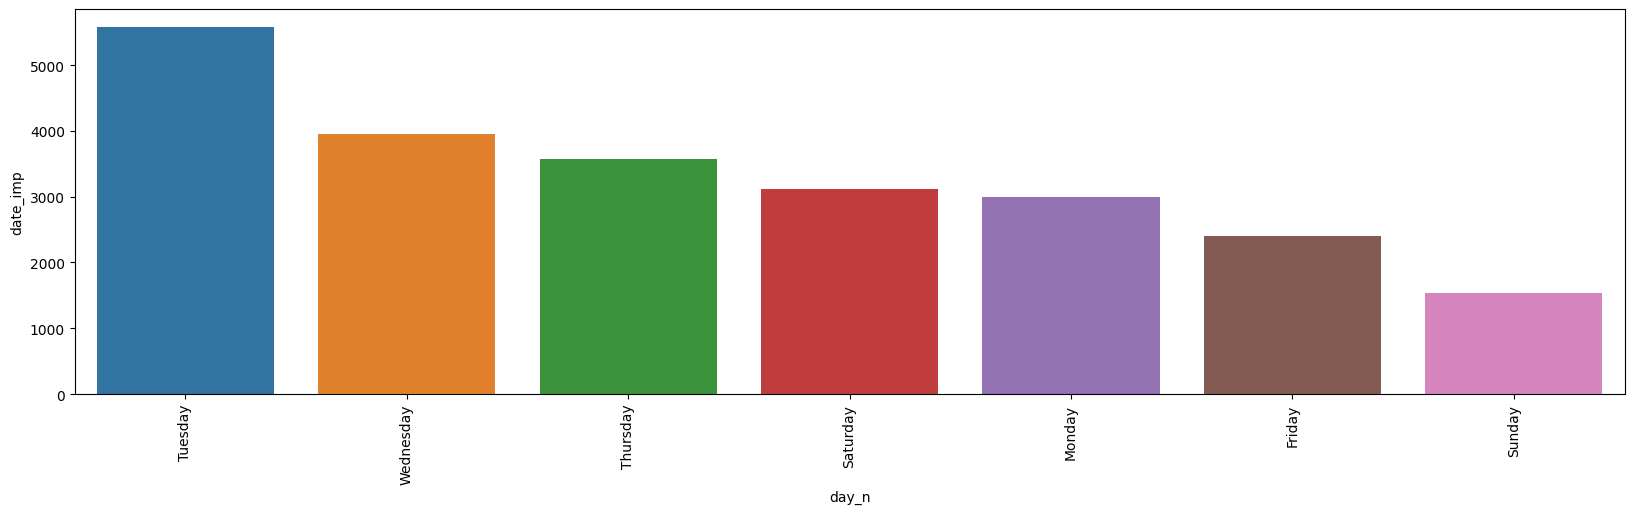

In [19]:
plt.figure(figsize=(20,5))
aux1 = df2[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=10)
sns.barplot( data=aux1, x='day_n', y='date_imp' );

### 2.4.2 Por Loja

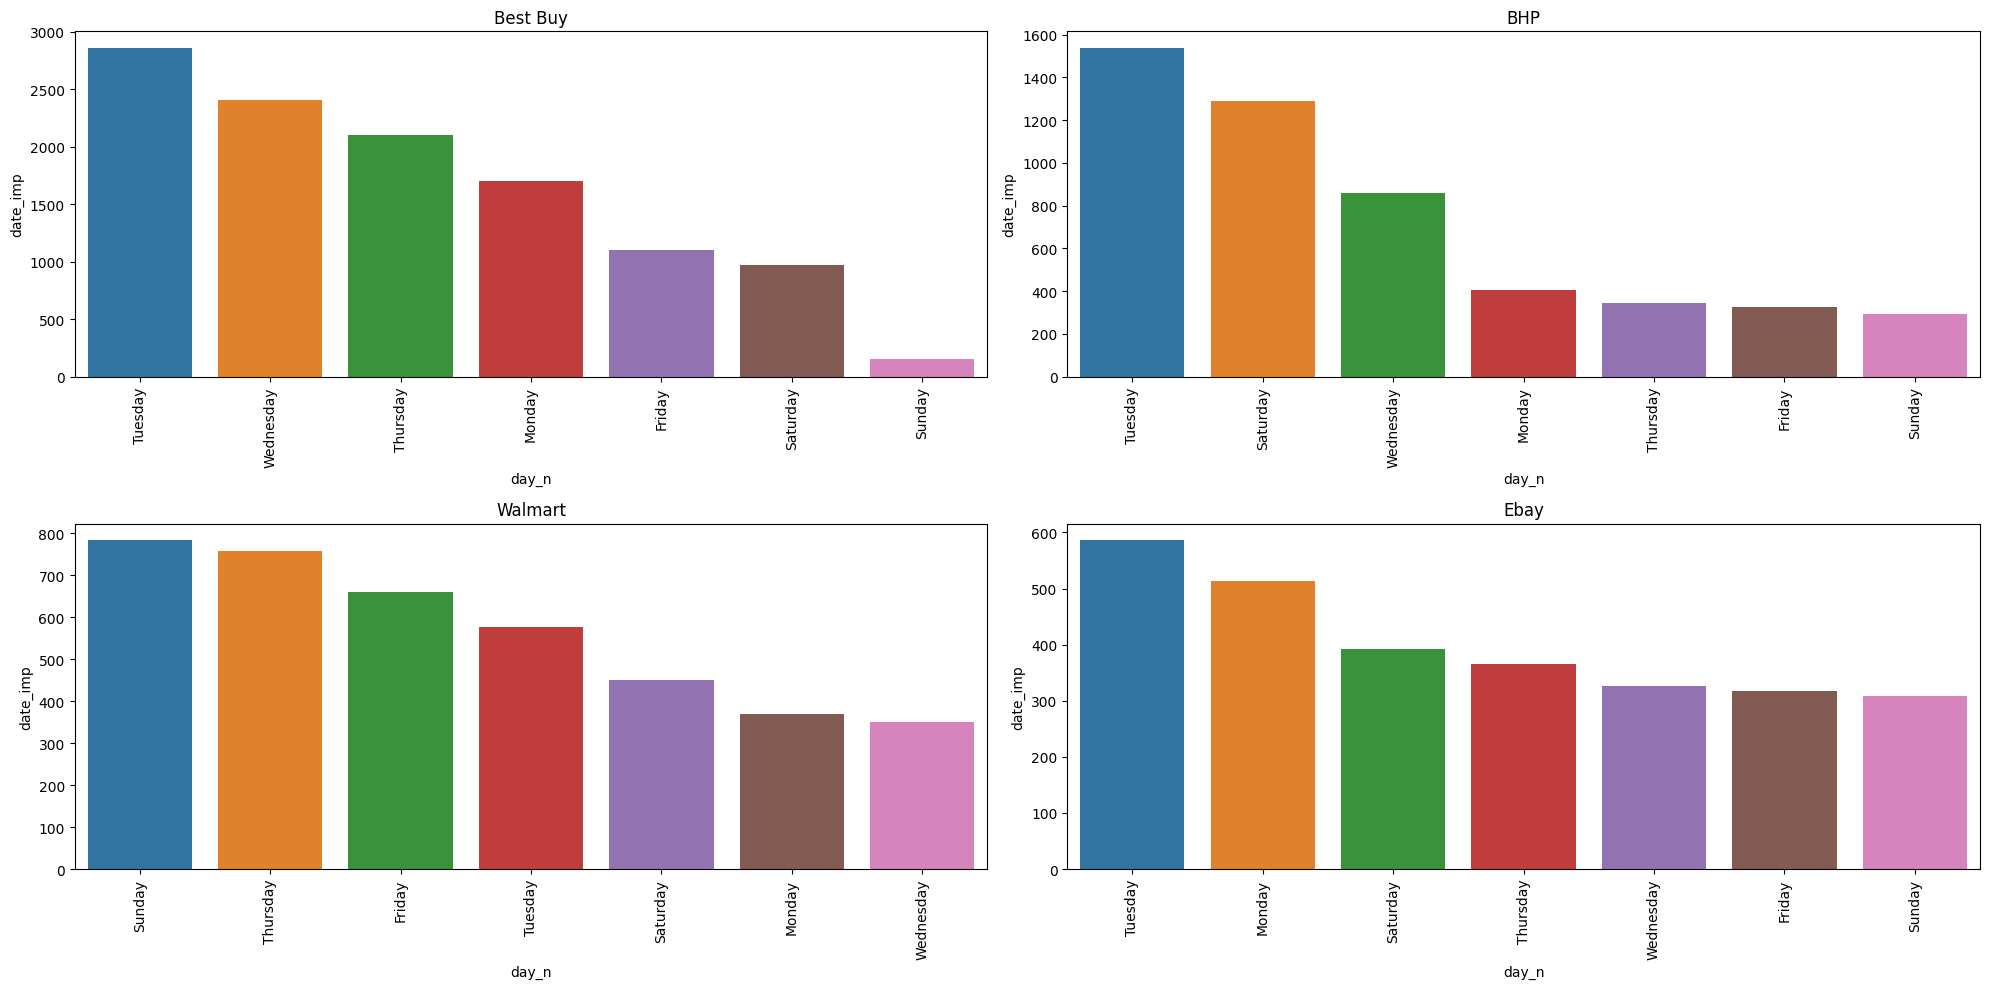

In [20]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1.head(10), x='day_n', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2.head(10), x='day_n', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3.head(10), x='day_n', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4.head(10), x='day_n', y='date_imp' );

plt.tight_layout()

## 2.5 Quais meses mais vendem?

### 2.5.1 No Geral

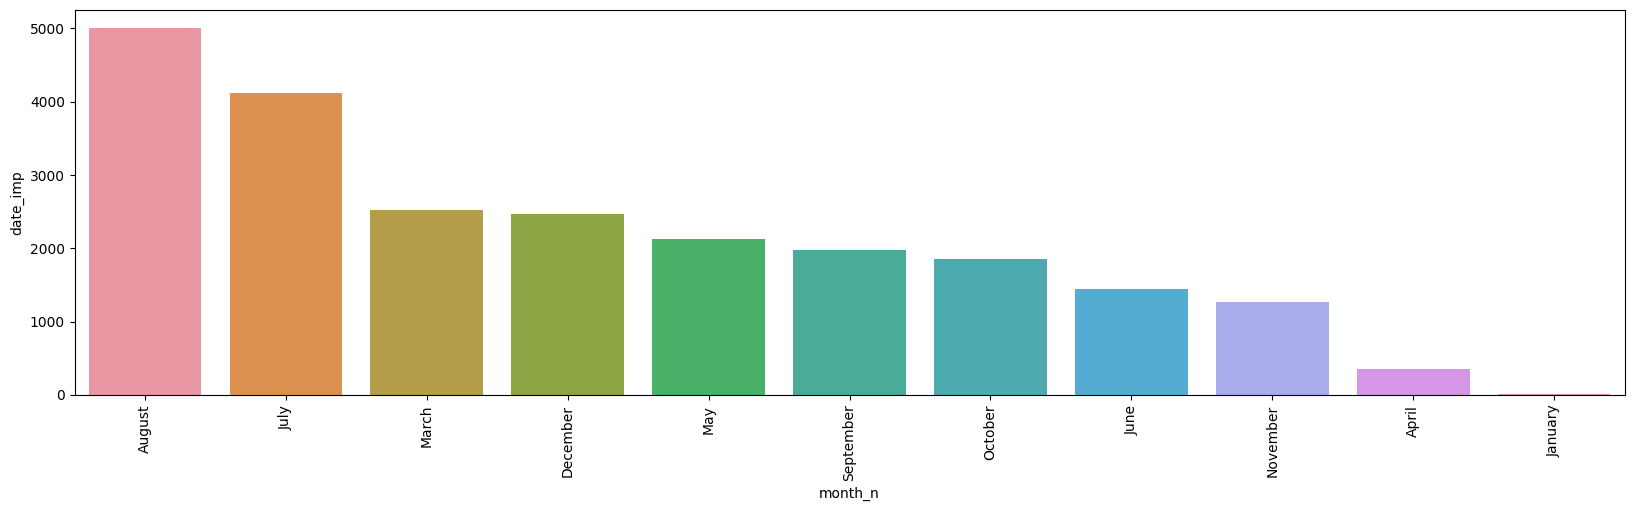

In [21]:
plt.figure(figsize=(20,5))
aux1 = df2[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=10)
sns.barplot( data=aux1, x='month_n', y='date_imp' );

### 2.5.2 Por Loja

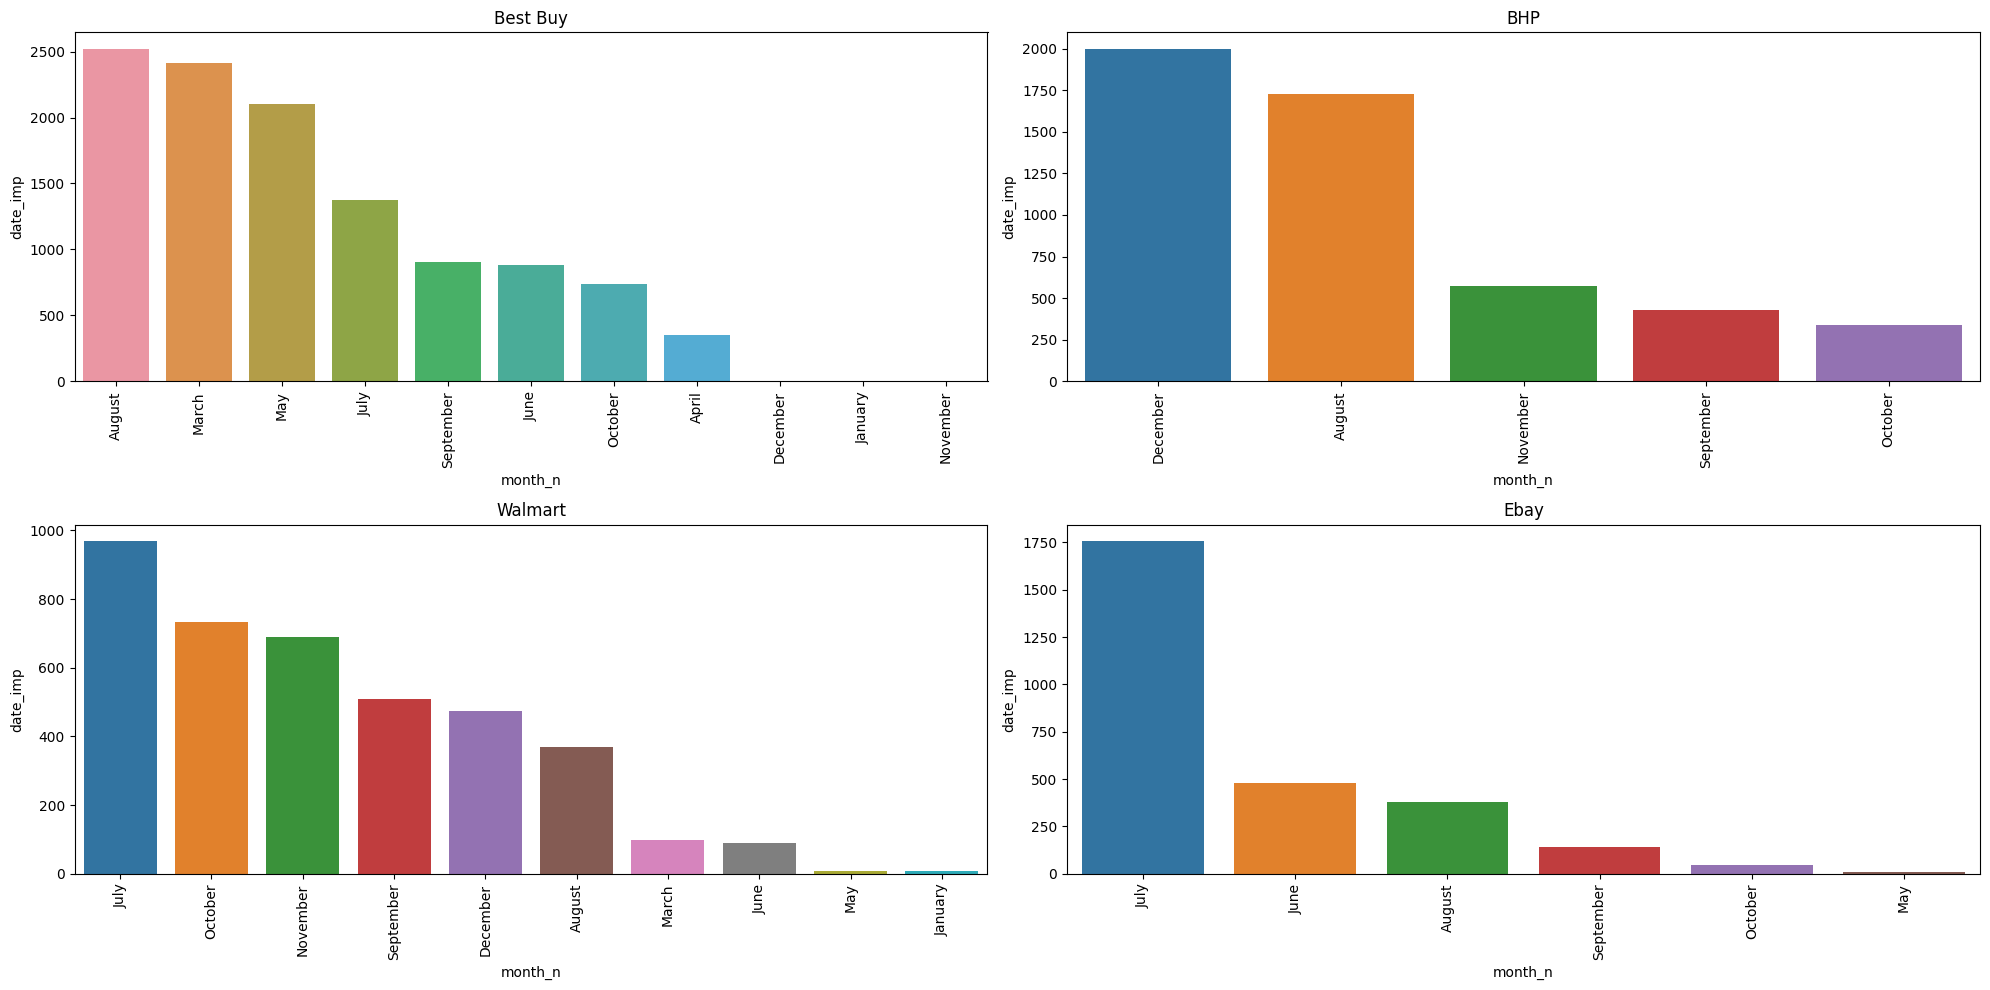

In [22]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1, x='month_n', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2, x='month_n', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3, x='month_n', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4, x='month_n', y='date_imp' );

plt.tight_layout()

## 2.6 Quais semanas mais vendem?

### 2.6.1 No Geral

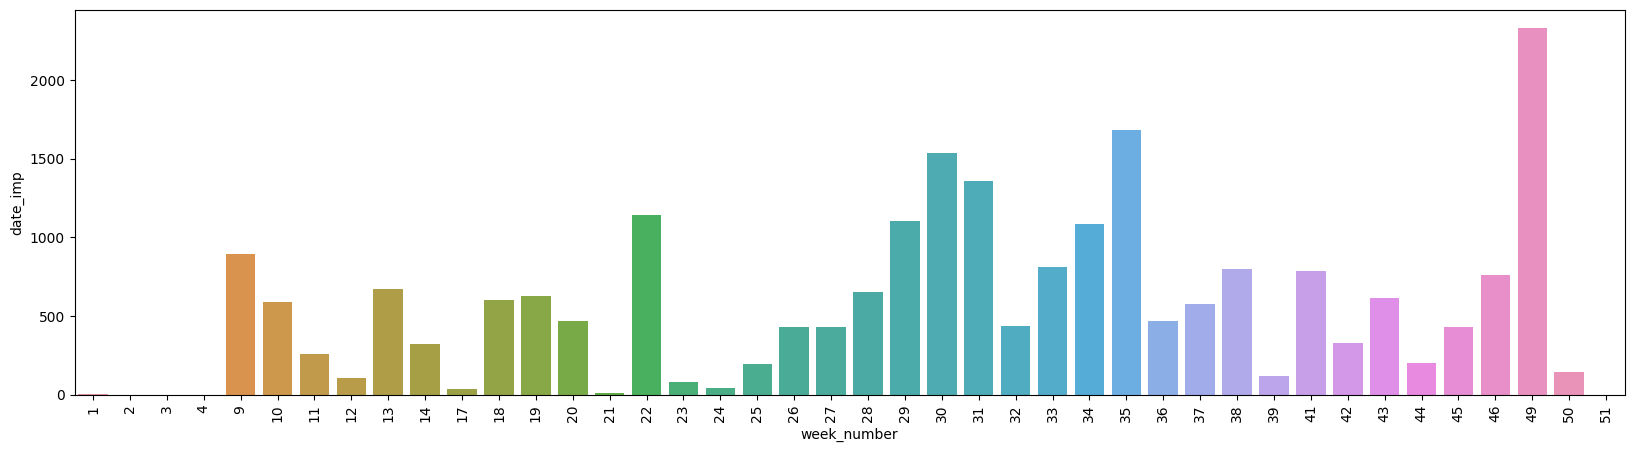

In [23]:
plt.figure(figsize=(20,5))
aux1 = df2[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=10)
sns.barplot( data=aux1, x='week_number', y='date_imp' );

### 2.6.2 Por Loja

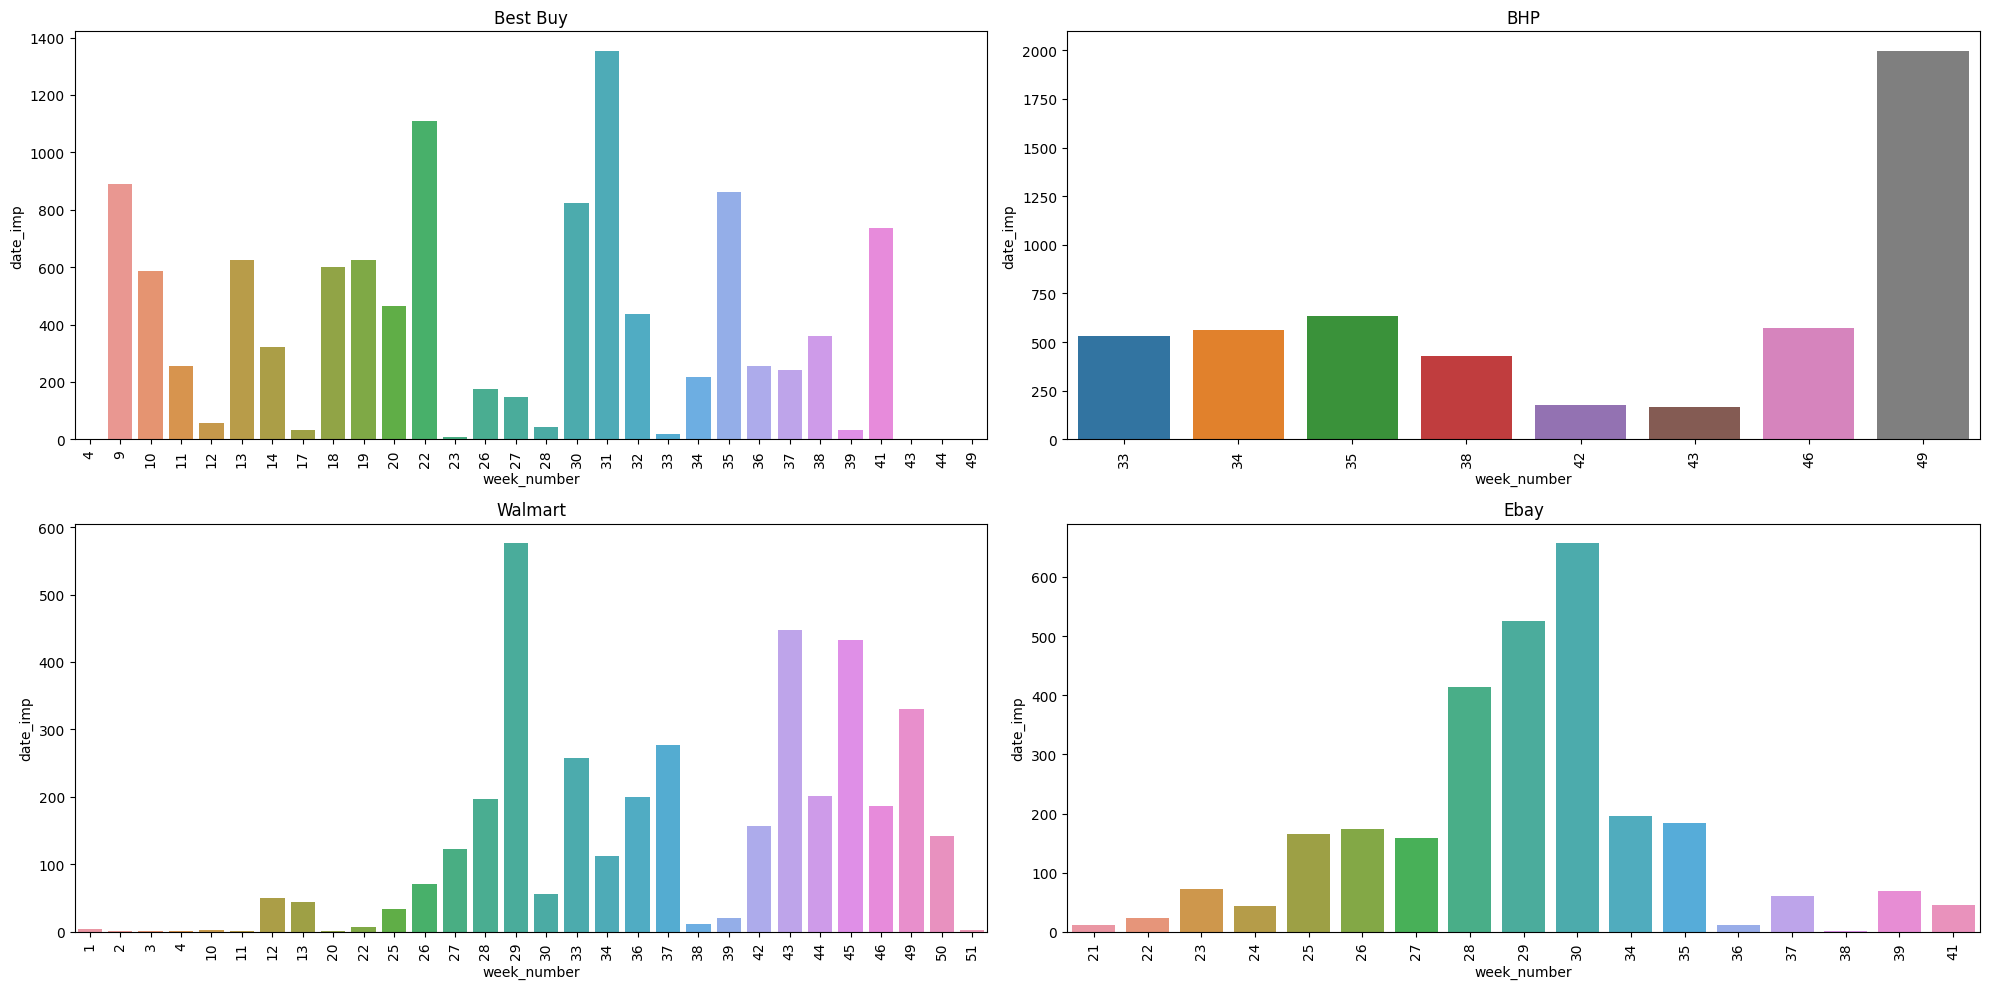

In [24]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
aux1 = df_bb[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Best Buy')
sns.barplot( data=aux1, x='week_number', y='date_imp' );

plt.subplot(2,2,2)
aux2 = df_bhp[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('BHP')
sns.barplot( data=aux2, x='week_number', y='date_imp' );

plt.subplot(2,2,3)
aux3 = df_walmart[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart')
sns.barplot( data=aux3, x='week_number', y='date_imp' );

plt.subplot(2,2,4)
aux4 = df_ebay[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay')
sns.barplot( data=aux4, x='week_number', y='date_imp' );

plt.tight_layout()

# 3.0 Feature Engineering

In [25]:
df3 = df2.copy()

## 3.1. Categoria mais vendida da BestBuy

In [115]:
# Pegando a categoria mais vendida da loja mais vendida
df_best = df_bb.loc[( df_bb['category_name'] == 'laptop, computer'), :]

In [114]:
# Calculando a média de preço por semana e a demanda
df_test = df_best.groupby(['name', 'week_number']).agg({ 'disc_price': 'mean', 'date_imp': 'count' }).reset_index()

# Pivotando o DataFrame
x_price = df_test.pivot( index='week_number', columns='name', values='disc_price' )
x_price = pd.DataFrame(x_price.to_records())
y_demand = df_test.pivot( index='week_number', columns='name', values='date_imp' )
y_demand = pd.DataFrame(y_demand.to_records())

# 4.0 Descrição dos Dados

## 4.1. Data Shape

In [116]:
print(f'Number of Rows on Price: {x_price.shape[0]}')
print(f'Number of Columns on Price: {x_price.shape[1]}')

print(f'Number of Rows n Demand: {y_demand.shape[0]}')
print(f'Number of Columns on Demand: {y_demand.shape[1]}')

Number of Rows on Price: 26
Number of Columns on Price: 40
Number of Rows n Demand: 26
Number of Columns on Demand: 40


## 4.2. Check NA

In [117]:
print(x_price.isna().sum().sum())
print(y_demand.isna().sum().sum())

555
555


## 4.3. Replace NA

In [118]:
# Substituindo os preços das semanas que não venderam pela mediana
a = np.round( x_price.median(), 2)
x_price.fillna( a, inplace=True )

# Substituindo a demanda de quando não vendeu por 0
y_demand.fillna( 0, inplace=True )

## 4.4. Statistics Descriptive

### 4.4.1 Statistics for Price

In [69]:
# Central Tendency - mean, median

ct1 = pd.DataFrame( x_price.apply( np.mean ) ).T
ct2 = pd.DataFrame( x_price.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame( x_price.apply( np.std ) ).T
d2 = pd.DataFrame( x_price.apply( min ) ).T
d3 = pd.DataFrame( x_price.apply( max ) ).T
d4 = pd.DataFrame( x_price.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( x_price.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( x_price.apply( lambda x: x.kurtosis() ) ).T

# Concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,"12 MacBook (Mid 2017, Gold)",1454.990,1599.99,145.000,1547.124615,1551.99,25.648346,-2.457686,8.310054
1,"12 MacBook (Mid 2017, Silver)",1234.990,1299.99,65.000,1295.990000,1299.99,14.317821,-3.735032,13.784949
2,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,372.995,449.00,76.005,413.189808,415.50,15.423120,-1.054924,2.830858
3,"13.3 MacBook Air (Mid 2017, Silver)",911.990,969.99,58.000,949.297692,949.99,8.393080,-2.975611,16.702015
4,"15.4 MacBook Pro with Touch Bar (Late 2016, Si...",2327.990,2799.99,472.000,2607.393846,2618.99,112.833610,-1.131897,2.049122
5,"15.4 MacBook Pro with Touch Bar (Late 2016, Sp...",2023.990,2599.99,576.000,2346.913077,2353.99,122.523757,-0.274833,1.347179
6,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,237.490,313.49,76.000,299.720769,304.99,16.347918,-2.916993,8.218479
7,Acer - 2-in-1 15.6 Refurbished Touch-Screen La...,764.990,899.99,135.000,834.028462,829.99,27.804926,0.937281,2.943939
8,Acer 15.6 Chromebook CB5-571-C4G4,199.990,249.00,49.010,242.479231,249.00,14.017001,-2.306458,4.514429
9,Alienware - R3 17.3 Laptop - Intel Core i7 - 1...,1599.990,1899.99,300.000,1879.643846,1899.99,71.165540,-3.486137,11.301211


### 4.4.2. Statistics for Demand

In [70]:
# Central Tendency - mean, median

ct1 = pd.DataFrame( y_demand.apply( np.mean ) ).T
ct2 = pd.DataFrame( y_demand.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis

d1 = pd.DataFrame( y_demand.apply( np.std ) ).T
d2 = pd.DataFrame( y_demand.apply( min ) ).T
d3 = pd.DataFrame( y_demand.apply( max ) ).T
d4 = pd.DataFrame( y_demand.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( y_demand.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( y_demand.apply( lambda x: x.kurtosis() ) ).T

# Concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,"12 MacBook (Mid 2017, Gold)",0.0,8.0,8.0,0.961538,0.0,1.764626,2.738840,9.024976
1,"12 MacBook (Mid 2017, Silver)",0.0,2.0,2.0,0.384615,0.0,0.624926,1.474017,1.189701
2,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,0.0,4.0,4.0,1.038462,0.5,1.125945,0.606680,-0.428079
3,"13.3 MacBook Air (Mid 2017, Silver)",0.0,2.0,2.0,0.384615,0.0,0.788227,1.658711,0.807453
4,"15.4 MacBook Pro with Touch Bar (Late 2016, Si...",0.0,6.0,6.0,1.153846,0.0,1.609881,1.437577,1.673167
5,"15.4 MacBook Pro with Touch Bar (Late 2016, Sp...",0.0,12.0,12.0,3.230769,1.0,3.885948,0.951022,-0.225438
6,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,0.0,2.0,2.0,0.538462,0.0,0.887120,1.105353,-0.849951
7,Acer - 2-in-1 15.6 Refurbished Touch-Screen La...,0.0,2.0,2.0,0.384615,0.0,0.624926,1.474017,1.189701
8,Acer 15.6 Chromebook CB5-571-C4G4,0.0,4.0,4.0,0.769231,1.0,0.932643,1.711207,4.066693
9,Alienware - R3 17.3 Laptop - Intel Core i7 - 1...,0.0,2.0,2.0,0.615385,1.0,0.624926,0.534925,-0.518213


# 5.0. Exploratory Data Analysis

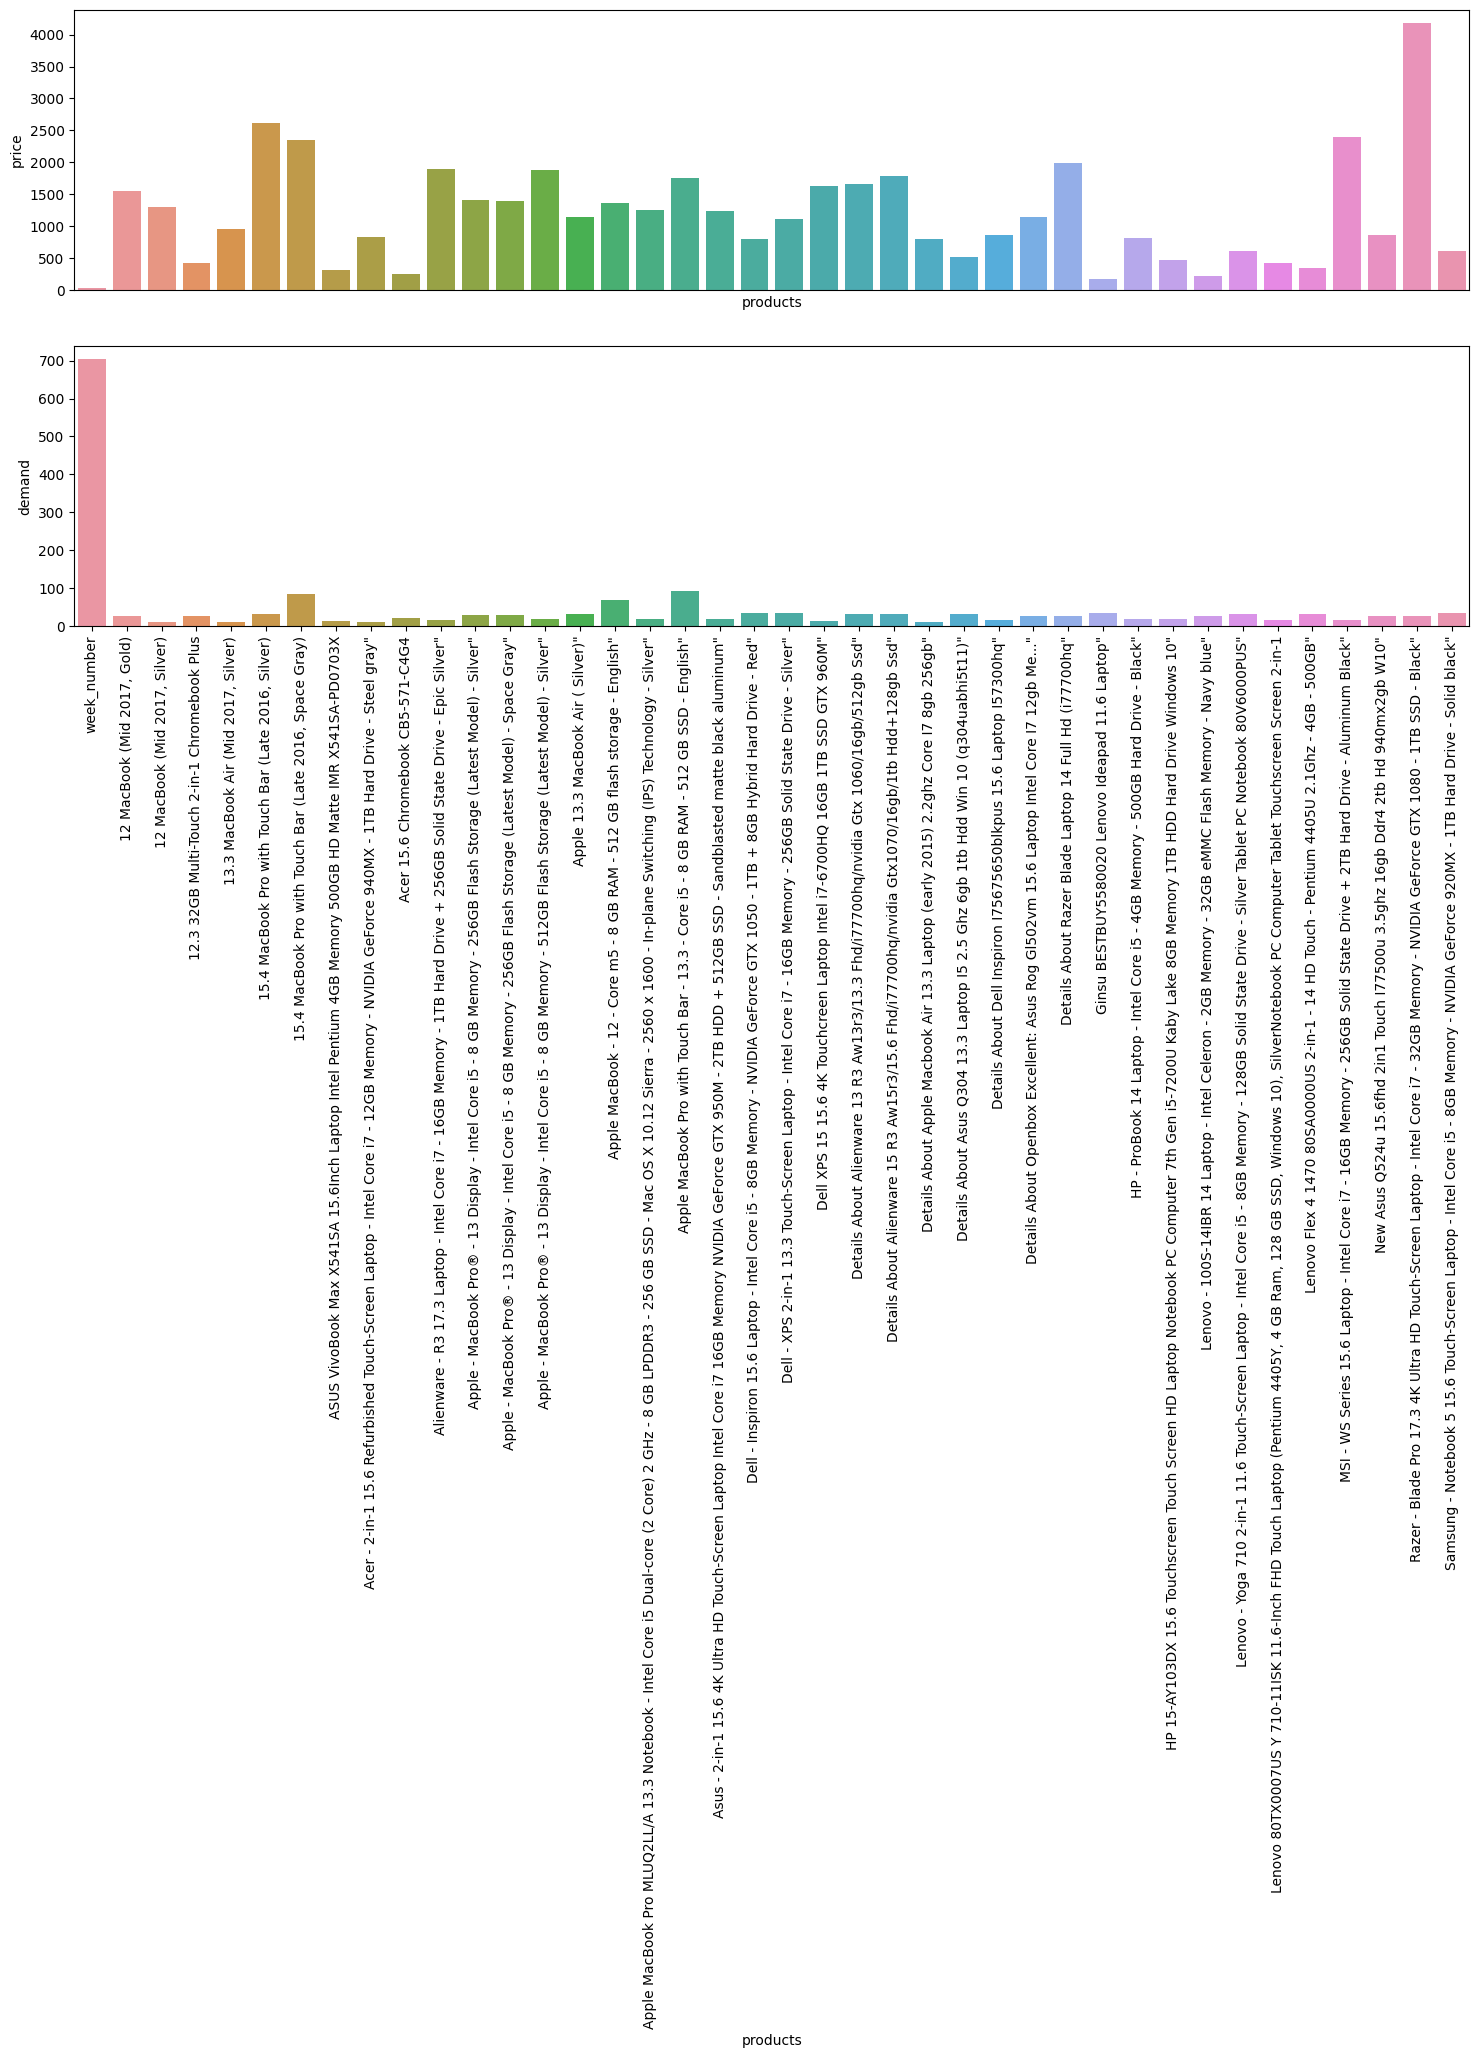

In [102]:
plt.figure(figsize=( 18, 8 ))

# Plotando os produtos em relação ao preço mediano
plt.subplot( 2, 1, 1 )
aux1 = pd.DataFrame( x_price.apply(lambda x: x.median() ) ).reset_index()
aux1.columns = ['products', 'price']
sns.barplot( data=aux1, x='products', y='price' )
plt.xticks([])

# Plotando os produtos em relação a demanda
plt.subplot( 2, 1, 2 )
aux2 = pd.DataFrame( y_demand.apply(lambda x: x.sum() ) ).reset_index()
aux2.columns = ['products', 'demand']
plt.xticks(rotation=90)
sns.barplot( data=aux2, x='products', y='demand' );

In [122]:
a = ['12 MacBook (Mid 2017, Gold)', '12 MacBook (Mid 2017, Silver)',
       '12.3 32GB Multi-Touch 2-in-1 Chromebook Plus',
       '13.3 MacBook Air (Mid 2017, Silver)',
       '15.4 MacBook Pro with Touch Bar (Late 2016, Silver)',
       '15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)',
       'ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X',
       'Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"',
       'Acer 15.6 Chromebook CB5-571-C4G4',
       'Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Silver"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Space Gray"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 512GB Flash Storage (Latest Model) - Silver"',
       'Apple 13.3 MacBook Air ( Silver)"',
       'Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 GB flash storage - English"',
       'Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - Intel Core i5 Dual-core (2 Core) 2 GHz - 8 GB LPDDR3 - 256 GB SSD - Mac OS X 10.12 Sierra - 2560 x 1600 - In-plane Switching (IPS) Technology - Silver"',
       'Apple MacBook Pro with Touch Bar - 13.3 - Core i5 - 8 GB RAM - 512 GB SSD - English"',
       'Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen Laptop Intel Core i7 16GB Memory NVIDIA GeForce GTX 950M - 2TB HDD + 512GB SSD - Sandblasted matte black aluminum"',
       'Dell - Inspiron 15.6 Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce GTX 1050 - 1TB + 8GB Hybrid Hard Drive - Red"',
       'Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive - Silver"',
       'Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7-6700HQ 16GB 1TB SSD GTX 960M"',
       'Details About Alienware 13 R3 Aw13r3/13.3 Fhd/i77700hq/nvidia Gtx 1060/16gb/512gb Ssd"',
       'Details About Alienware 15 R3 Aw15r3/15.6 Fhd/i77700hq/nvidia Gtx1070/16gb/1tb Hdd+128gb Ssd"',
       'Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb"',
       'Details About Asus Q304 13.3 Laptop I5 2.5 Ghz 6gb 1tb Hdd Win 10 (q304uabhi5t11)"',
       'Details About Dell Inspiron I75675650blkpus 15.6 Laptop I57300hq"',
       'Details About Openbox Excellent: Asus Rog Gl502vm 15.6 Laptop Intel Core I7 12gb Me..."',
       'Details About Razer Blade Laptop 14 Full Hd (i77700hq"',
       'Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"',
       'HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black"',
       'HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10"',
       'Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue"',
       'Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS"',
       'Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1',
       'Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB"',
       'MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black"',
       'New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10"',
       'Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black"',
       'Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"']

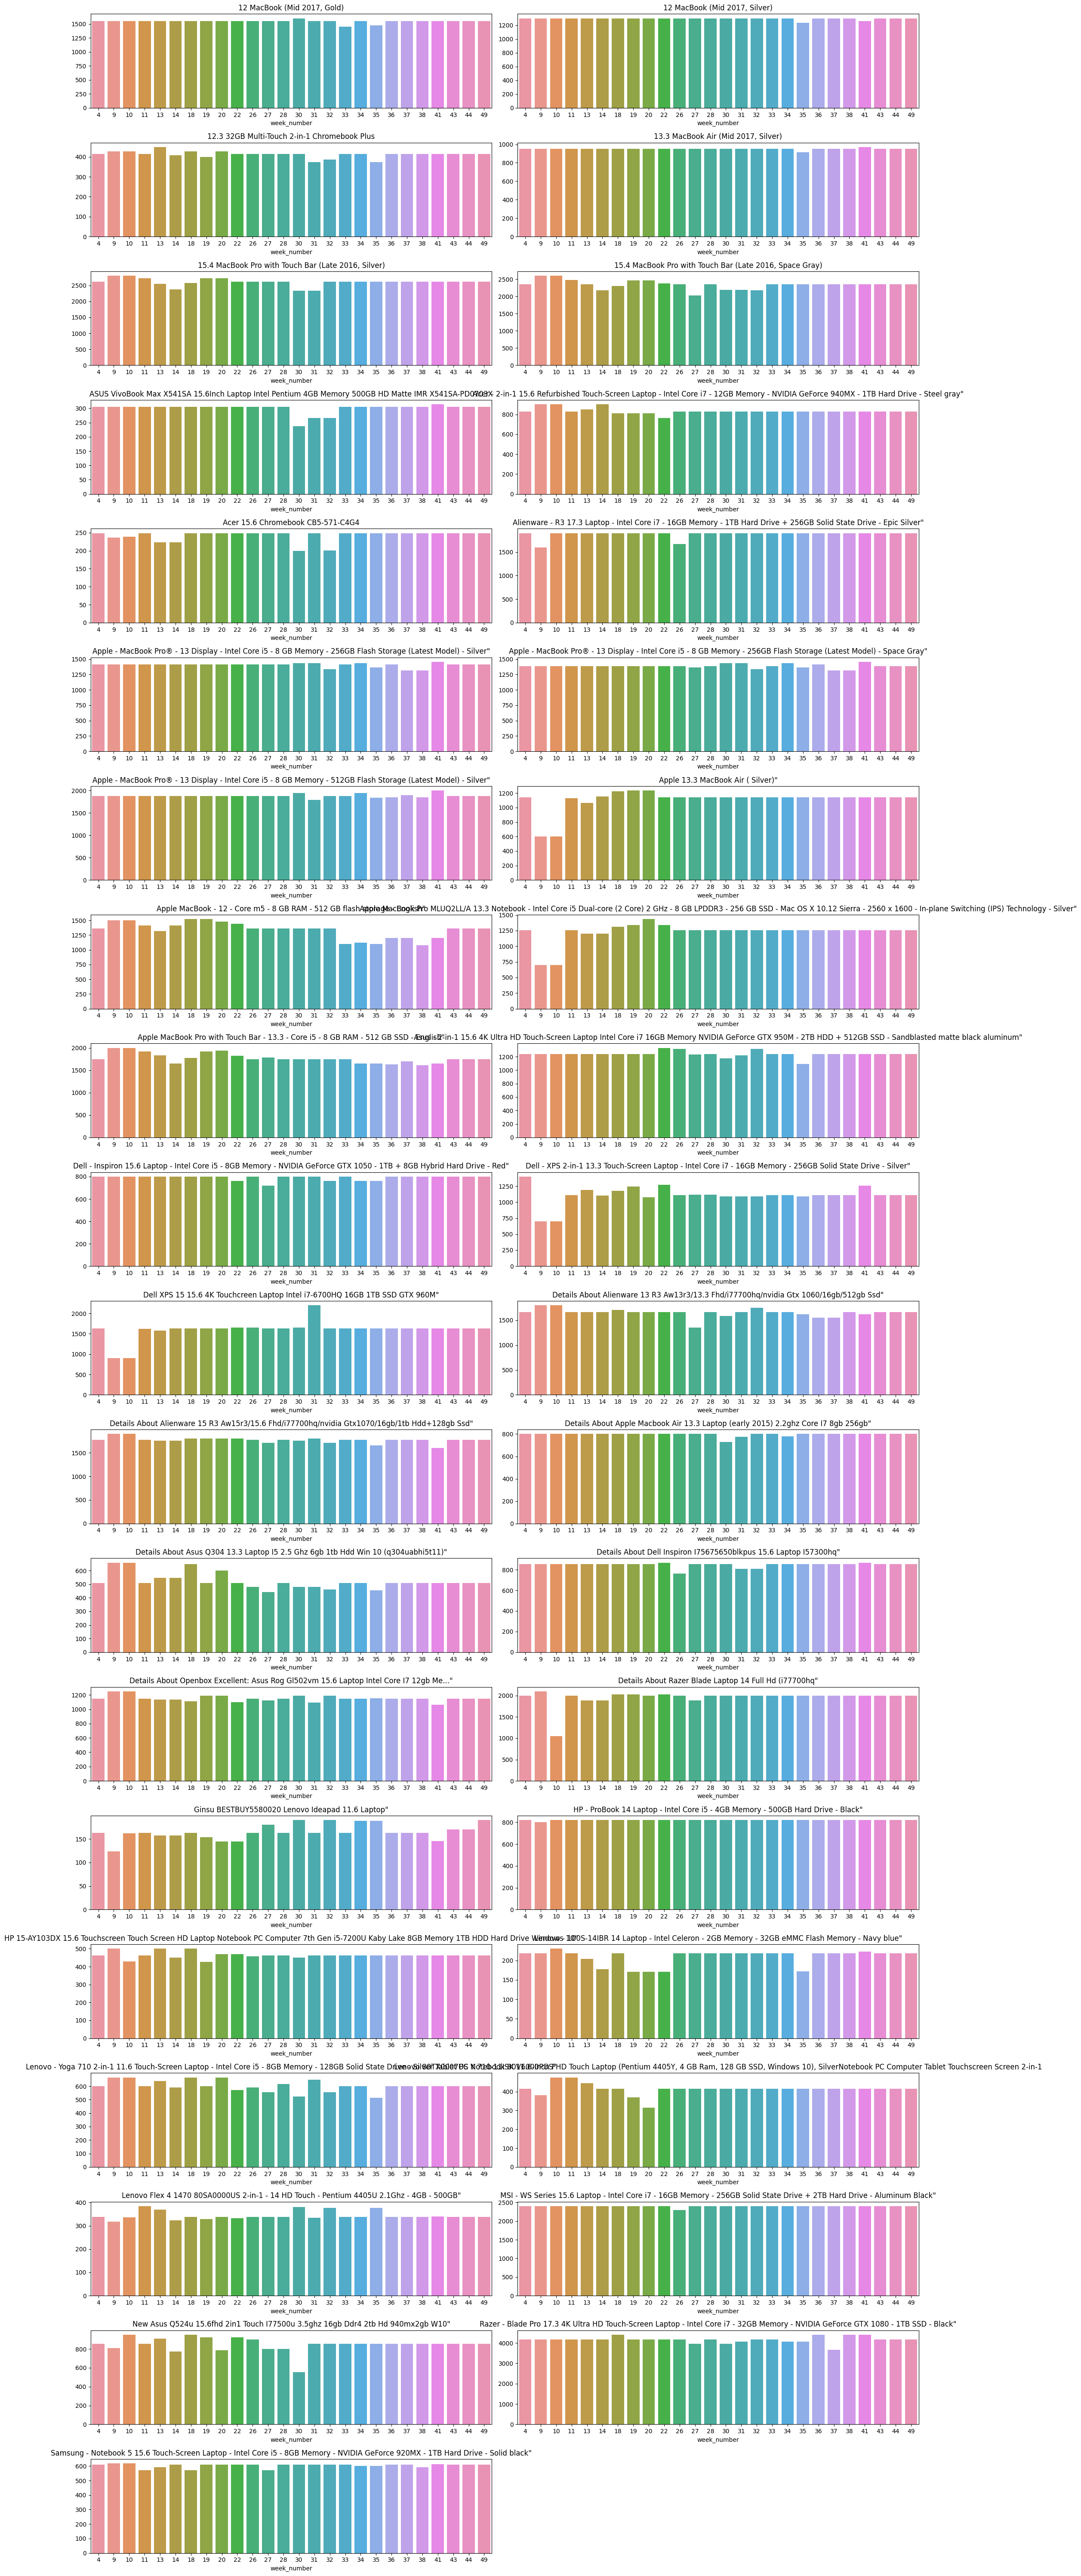

In [123]:
plt.figure(figsize=(20,60))

for k in np.arange(1, len(x_price.columns), 1):
    plt.subplot( 20, 2, k )
    sns.barplot( data=x_price, x='week_number', y=x_price[x_price.columns[k]] )
    plt.title(a[k-1])
    plt.ylabel('')
    plt.tight_layout()

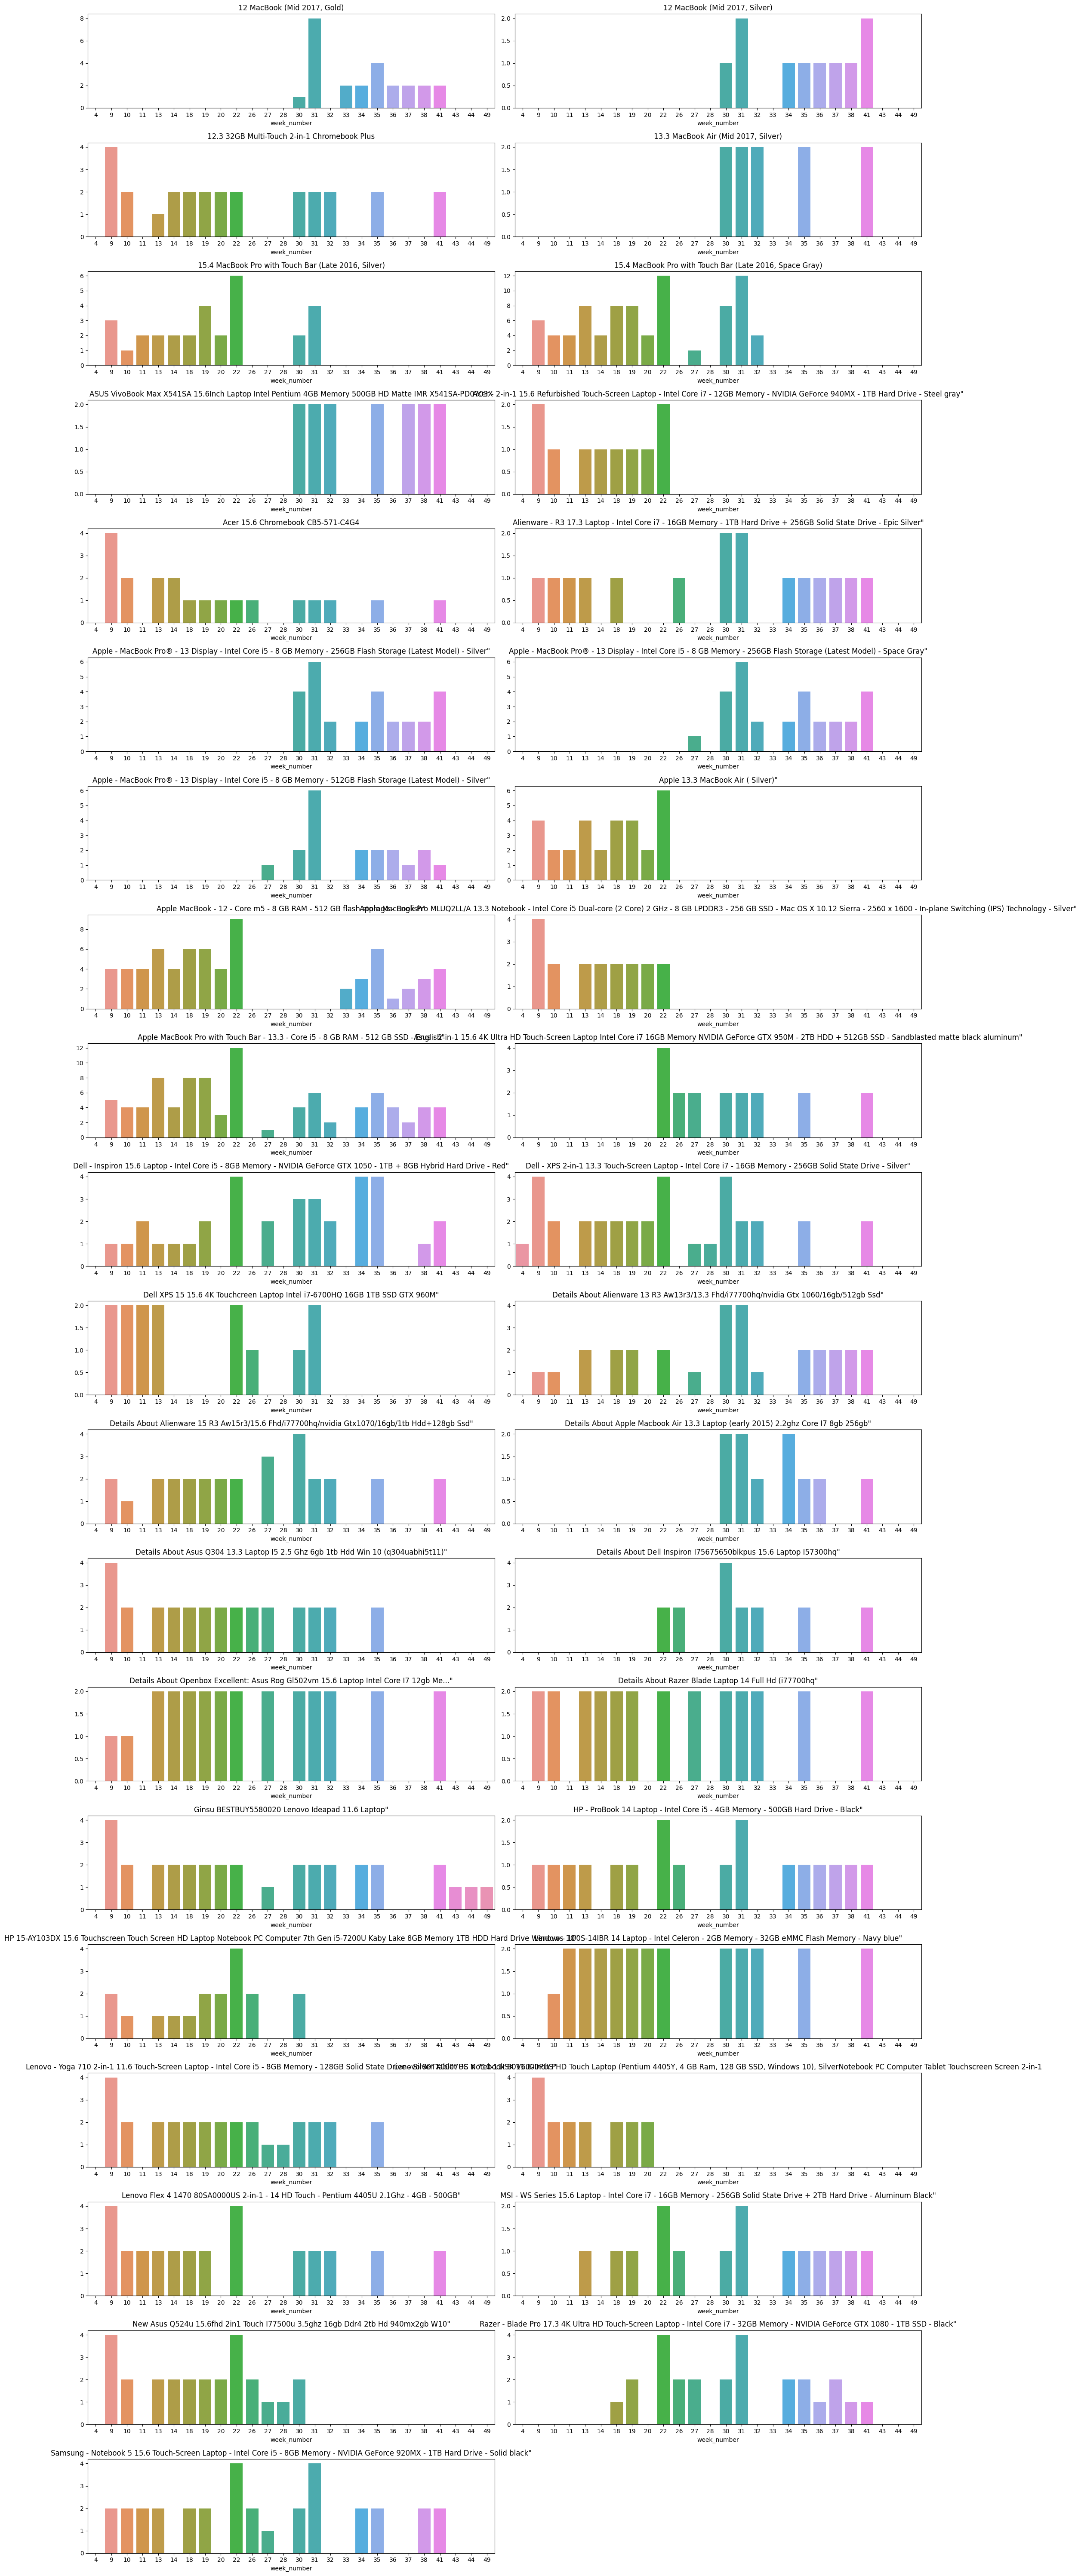

In [124]:
plt.figure(figsize=(20,60))

for k in np.arange(1, len(y_demand.columns), 1):
    plt.subplot( 20, 2, k )
    sns.barplot( data=y_demand, x='week_number', y=y_demand[y_demand.columns[k]] )
    plt.title(a[k-1])
    plt.ylabel('')
    plt.tight_layout()